Epoch 1/200
36/36 [==============================] - 11s 127ms/step - loss: 0.3755 - val_loss: 0.0016
Epoch 2/200
36/36 [==============================] - 3s 91ms/step - loss: 0.2568 - val_loss: 0.0042
Epoch 3/200
36/36 [==============================] - 3s 92ms/step - loss: 0.1800 - val_loss: 8.7757e-04
Epoch 4/200
36/36 [==============================] - 3s 90ms/step - loss: 0.1368 - val_loss: 0.0336
Epoch 5/200
36/36 [==============================] - 3s 94ms/step - loss: 0.1253 - val_loss: 0.0020
Epoch 6/200
36/36 [==============================] - 3s 88ms/step - loss: 0.0943 - val_loss: 7.8271e-04
Epoch 7/200
36/36 [==============================] - 3s 89ms/step - loss: 0.0763 - val_loss: 0.0099
Epoch 8/200
36/36 [==============================] - 3s 92ms/step - loss: 0.0582 - val_loss: 0.0136
Epoch 9/200
36/36 [==============================] - 4s 101ms/step - loss: 0.0478 - val_loss: 0.0056
Epoch 10/200
36/36 [==============================] - 4s 100ms/step - loss: 0.0441 - val_

36/36 [==============================] - 4s 100ms/step - loss: 0.0022 - val_loss: 5.2748e-04
Epoch 82/200
36/36 [==============================] - 4s 98ms/step - loss: 0.0021 - val_loss: 5.6320e-04
Epoch 83/200
36/36 [==============================] - 3s 93ms/step - loss: 0.0022 - val_loss: 5.2271e-04
Epoch 84/200
36/36 [==============================] - 3s 96ms/step - loss: 0.0023 - val_loss: 6.2907e-04
Epoch 85/200
36/36 [==============================] - 3s 95ms/step - loss: 0.0022 - val_loss: 5.8648e-04
Epoch 86/200
36/36 [==============================] - 4s 100ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 87/200
36/36 [==============================] - 4s 99ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 88/200
36/36 [==============================] - 4s 99ms/step - loss: 0.0020 - val_loss: 5.1254e-04
Epoch 89/200
36/36 [==============================] - 4s 101ms/step - loss: 0.0023 - val_loss: 8.5219e-04
Epoch 90/200
36/36 [==============================] - 4s 101ms/step - los

36/36 [==============================] - 4s 100ms/step - loss: 0.0014 - val_loss: 9.5591e-04
Epoch 160/200
36/36 [==============================] - 4s 103ms/step - loss: 0.0012 - val_loss: 6.6115e-04
Epoch 161/200
36/36 [==============================] - 4s 102ms/step - loss: 0.0013 - val_loss: 4.3566e-04
Epoch 162/200
36/36 [==============================] - 4s 99ms/step - loss: 0.0011 - val_loss: 4.2243e-04
Epoch 163/200
36/36 [==============================] - 4s 100ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 164/200
36/36 [==============================] - 4s 99ms/step - loss: 0.0014 - val_loss: 4.3002e-04
Epoch 165/200
36/36 [==============================] - 3s 91ms/step - loss: 0.0011 - val_loss: 6.8161e-04
Epoch 166/200
36/36 [==============================] - 3s 91ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 167/200
36/36 [==============================] - 3s 95ms/step - loss: 0.0011 - val_loss: 4.5660e-04
Epoch 168/200
36/36 [==============================] - 3s 92ms/s

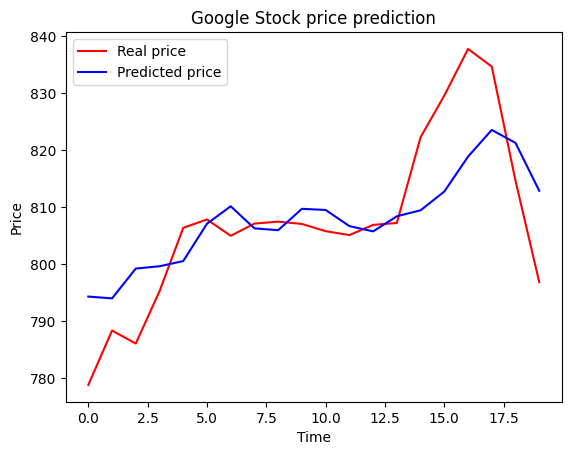

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Load datasets
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

# Choosing column 'open' for prediction
train = train_df.loc[:,["Open"]].values
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

# Create data structure to train model
time = 60
x_train = []
y_train = []
for i in range(60, train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

# Build model
model = Sequential()
model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.05, verbose=1)

# Prepare test dataset
data = pd.concat((train_df['Open'], test_df['Open']), axis=0)
test_input = data.iloc[len(data) - len(test_df) - time:].values.reshape(-1, 1)
test_scaled = scaler.transform(test_input)

# Create test data set
x_test = []
for i in range(time, test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))

# Model Prediction
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

# Compute RMSE
y_test = test_df.loc[:, "Open"].values
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Plot results
plt.plot(y_test, color='red', label='Real price')
plt.plot(y_pred, color='blue', label='Predicted price')
plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
